## ALIDIN
## F1D018006

LINK YOUTUBE : https://youtu.be/GXLffYkr758

<pre>
Carilah dataset real, bebas dari internet dengan ketentuan sbb:

jumlah total atribut lebih dari 5
minimal jumlah data adalah 100 data
dapat digunakan untuk pemodelan Regresi
Kemudian, lakukan beberapa hal berikut:

1 tentukan variable dependent dan independent dari dataset
2 lakukan eksplorasi dan visualisasi data
3 lakukan data analisis dan juga pengecekan serta pembersihan data dari outlier dan missing data jika diperlukan
4 lakukan pemodelan regresi (linear dan berganda) dan seleksi fitur dengan korelasi agar mendapatkan atribut (variable independent) yang baik untuk digunakan pada model regresi
5 analisa dan jelaskan hasil evaluasi pemodelan regresi
6 lakukan pemodelan dengan regresi logistik dengan data yang sama dengan cara mentransformasikan variable dependent yang awalnya
  bernilai continue menjadi categorical (hint: Gunakan Binning Data in Pandas).
  Contoh: variable dependent harga mobil (bernilai continue) ditransformasikan menjadi harga model Mahal dan Murah (untuk 2 kelas)
  dan Mahal, Sedang, Murah (untuk 3 kelas)
7 analisa dan jelaskan hasil evaluasi pemodelan regresi logistik

Ketentuan yang harus dikumpulan adalah sebagai berikut: 
1 Source dalam format file jupiter notebook (.ipynb) lengkap dengan dataset.
2 Pengumpulan source code juga dapat dilakukan melalui git repository (Github/Gitlab) dengan melampirkan link menuju public
  repository pada assigment Berajah.
3 Video presentasi sederhana (tidak perlu banyak edit  seperti tambah efek suara atau animasi, karena video tidak masuk penilaian
  mengenai penjelasan source code dan hasilnya.
4 Durasi video minimal 4 menit dan maksimal 10 menit. Suara video harus terdengar dengan jelas dan menampilkan wajah dari presentasi
  Rekomendasi: Gunakan Aplikasi Zoom Free untuk record video, karena ada 40 Menit record zoom meeting mandiri untuk akun free)
5 Video di upload di kanal Youtube ataupun platform lainnya (Contoh: google drive), kemudian cukup melampirkan link menuju video saja.
6 Batas waktu pengumpulan sebelum 25 April 2021.

In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4]:
raw_data = pd.read_csv("insurance.csv")
raw_data.info()
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

## dataset summary
<pre>
+ age       : age of primary beneficiary
+ sex       : insurance contractor gender, female, male
+ bmi       : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
              objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
+ children  : Number of children covered by health insurance / Number of dependents
+ smoker    : Smoking
+ region    : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
+ charges   : Individual medical costs billed by health insurance

## jawaban nomor 1
tentukan variable dependent dan independent dari dataset:
<pre>
dependent  : charges
independen : age, sex, bmi, children, smoker, region
</pre>

## jawaban nomor 2 dan nomor 3

In [5]:
# cek colom region, sex, smoker
print(raw_data["region"].value_counts())
print("=====================================")
print(raw_data["sex"].value_counts())
print("=====================================")
print(raw_data["smoker"].value_counts())
print("=====================================")

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64
male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64


In [6]:
# ubah region ke numeric
new_val ={
    "sex" : {
        "male" : 1,
        "female" : 0
    },
    "smoker" :{
        "yes" : 1,
        "no" : 0
    },
    "region" :{
        "southeast" : 1,
        "southwest" : 2,
        "northwest" : 3,
        "northeast" : 4
    }
}
raw_data = raw_data.replace(new_val)
raw_data.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       2  16884.92400
1   18    1  33.770         1       0       1   1725.55230
2   28    1  33.000         3       0       1   4449.46200
3   33    1  22.705         0       0       3  21984.47061
4   32    1  28.880         0       0       3   3866.85520

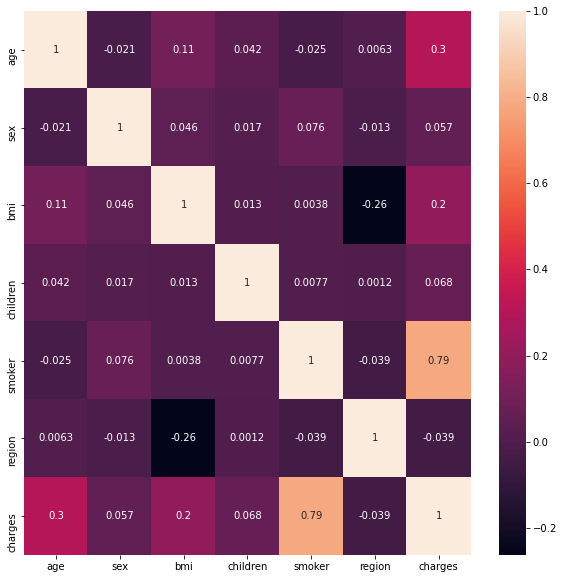

In [7]:
plt.figure(figsize=(10,10))
sb.heatmap(raw_data.corr(), annot=True)

In [8]:
# variabel degan korelasi terbaik : 
# continue age 0.3 , bmi 0,3, 
# kategori smoker 0.79 

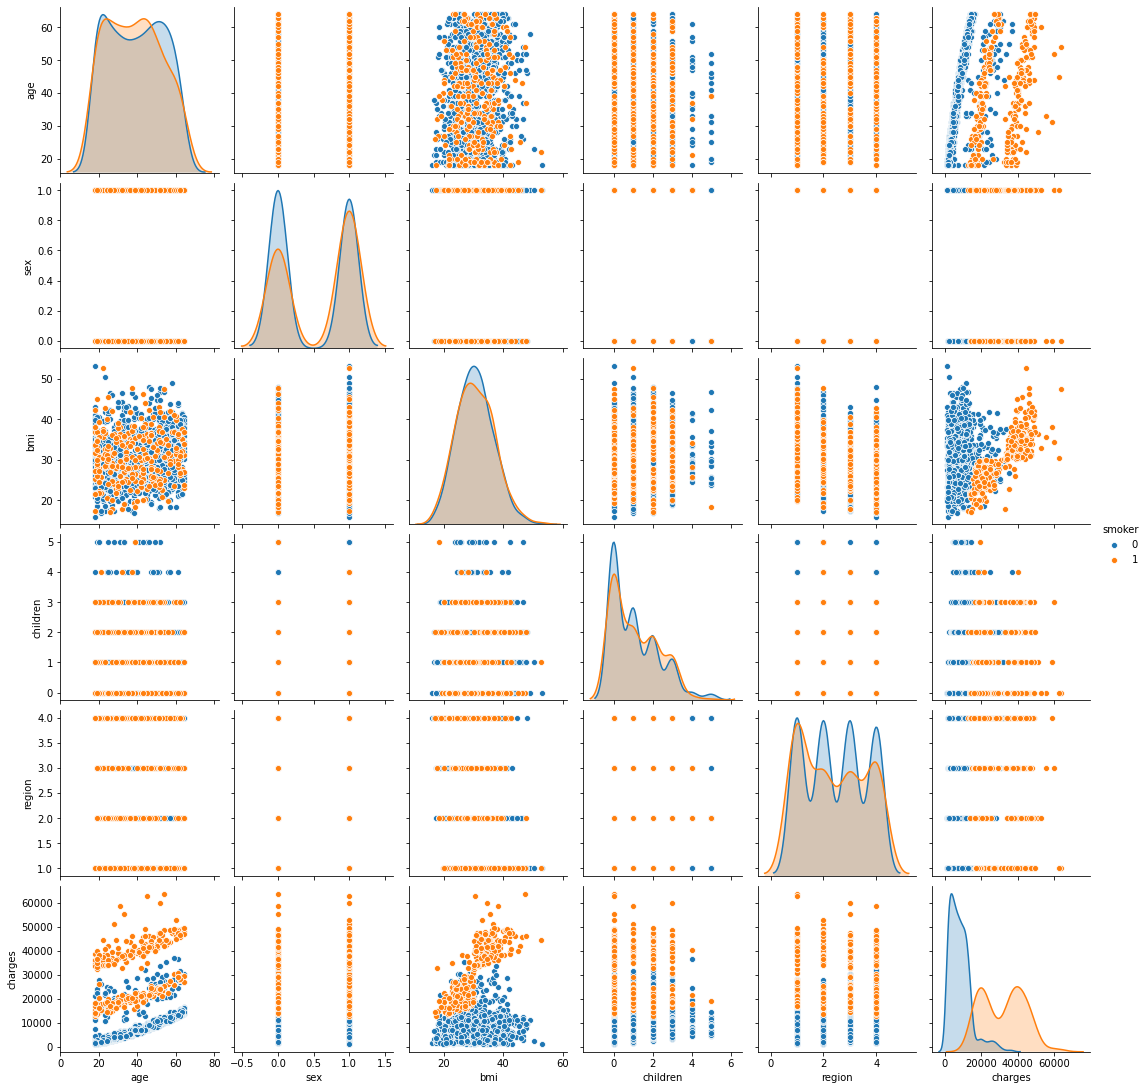

In [9]:
sb.pairplot(raw_data, hue="smoker")

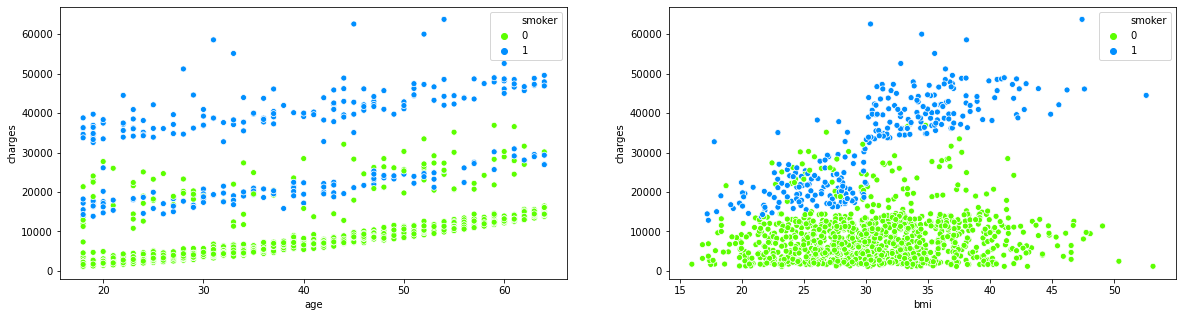

In [10]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sb.scatterplot(raw_data["age"],raw_data["charges"], hue=raw_data["smoker"],palette="gist_rainbow")
plt.subplot(1,2,2)
sb.scatterplot(raw_data["bmi"],raw_data["charges"], hue=raw_data["smoker"], palette="gist_rainbow")

In [11]:
# mengambil data yang akan digunakan :
data = raw_data[["age", "bmi", "smoker", "charges"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1338 non-null   int64  
 1   bmi      1338 non-null   float64
 2   smoker   1338 non-null   int64  
 3   charges  1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


## outer data
### + charges

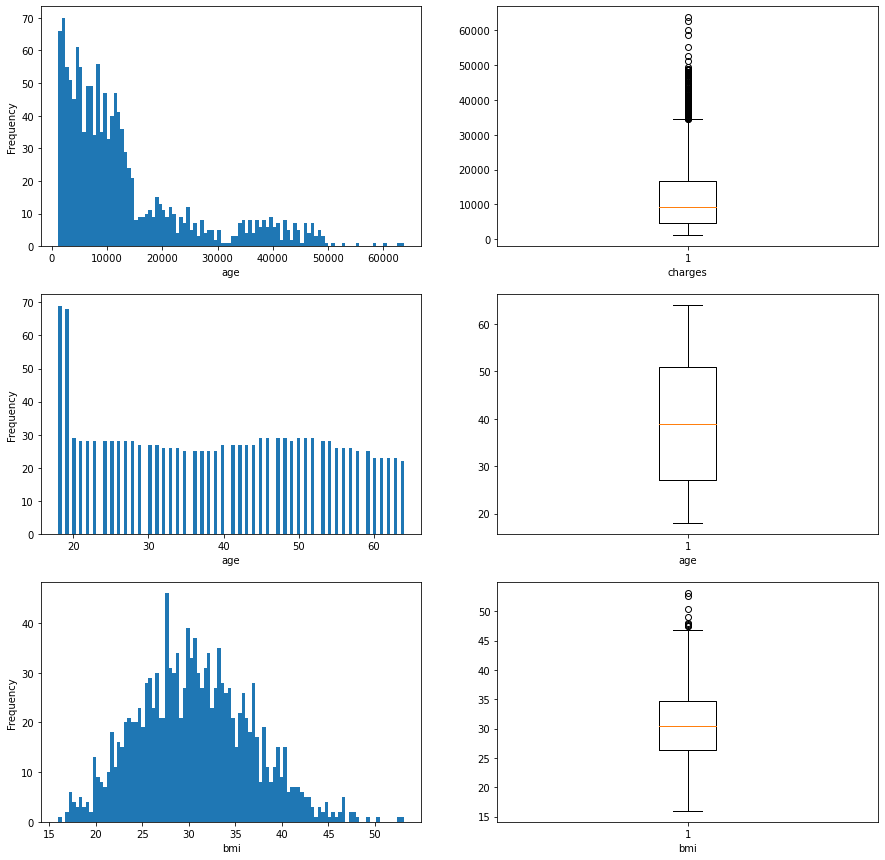

In [12]:
# charges
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
data["charges"].plot(kind='hist', bins=100)
plt.xlabel("age")

plt.subplot(3,2,2)
plt.boxplot(data["charges"])
plt.xlabel("charges")
# >50000

#age
plt.subplot(3,2,3)
data["age"].plot(kind='hist', bins=100)
plt.xlabel("age")

plt.subplot(3,2,4)
plt.boxplot(data["age"])
plt.xlabel("age")
# aman

#bmi
plt.subplot(3,2,5)
data["bmi"].plot(kind='hist', bins=100)
plt.xlabel("bmi")

plt.subplot(3,2,6)
plt.boxplot(data["bmi"])
plt.xlabel("bmi")

plt.show()
# <18, >47

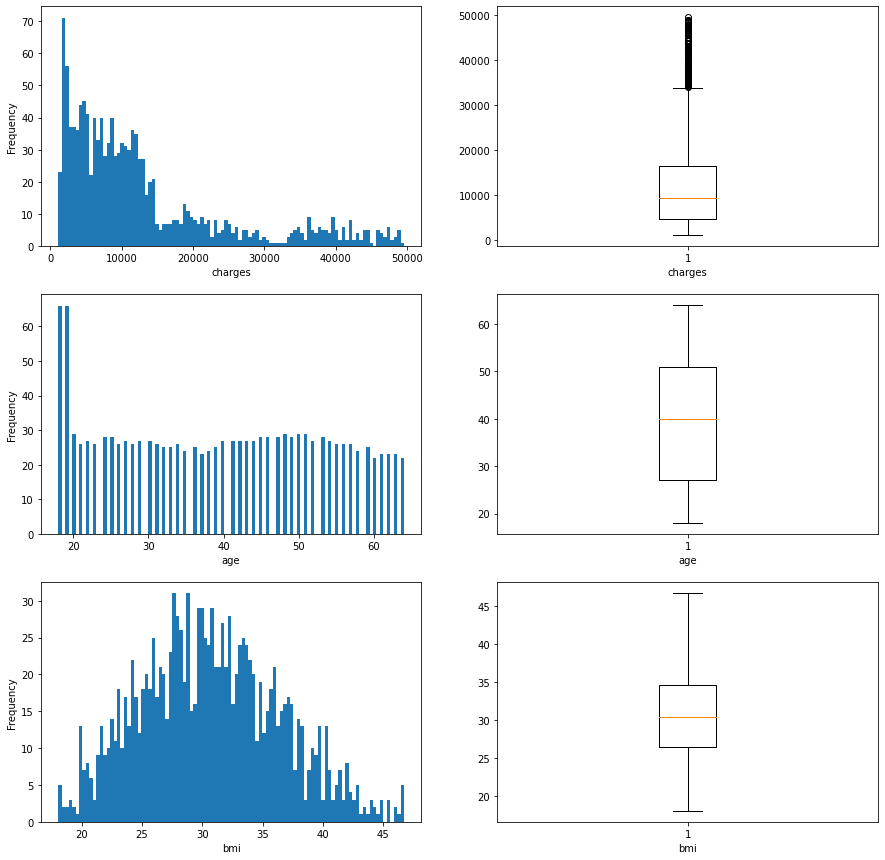

In [40]:
# dari plot diatas ditemukan bahwa oter data berada di range 50000 - 60000
clean_data = data[data["charges"]<=50000]
clean_data = clean_data[clean_data["bmi"]<47]
clean_data = clean_data[clean_data["bmi"]>18]

# plot clean data
# charges
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
clean_data["charges"].plot(kind='hist', bins=100)
plt.xlabel("charges")

plt.subplot(3,2,2)
plt.boxplot(clean_data["charges"])
plt.xlabel("charges")
# >50000

#age
plt.subplot(3,2,3)
clean_data["age"].plot(kind='hist', bins=100)
plt.xlabel("age")

plt.subplot(3,2,4)
plt.boxplot(clean_data["age"])
plt.xlabel("age")
# aman

#bmi
plt.subplot(3,2,5)
clean_data["bmi"].plot(kind='hist', bins=100)
plt.xlabel("bmi")

plt.subplot(3,2,6)
plt.boxplot(clean_data["bmi"])
plt.xlabel("bmi")

plt.show()
# <18, >47

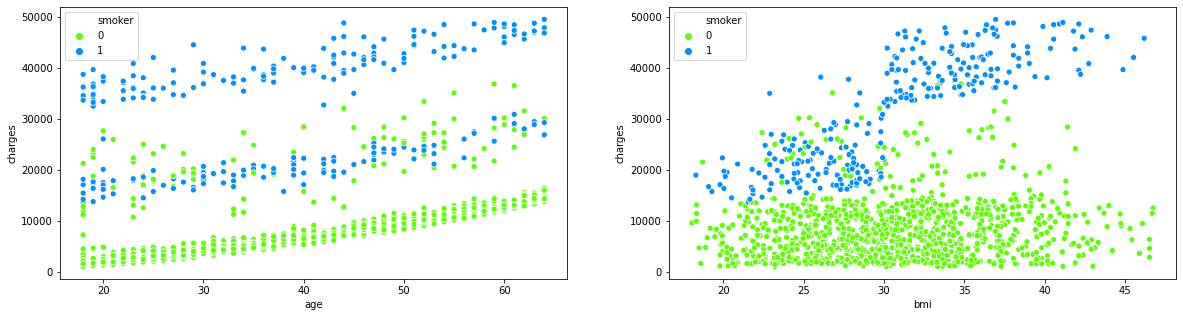

In [14]:
# lakukan visualisasi data lagi setelah outer hilang
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sb.scatterplot(clean_data["age"],clean_data["charges"], hue=clean_data["smoker"], palette="gist_rainbow")
plt.subplot(1,2,2)
sb.scatterplot(clean_data["bmi"],clean_data["charges"], hue=clean_data["smoker"], palette="gist_rainbow")

In [15]:
# membagi data
smoker  = clean_data[clean_data["smoker"]==1]
non_smoker = clean_data[clean_data["smoker"]==0]

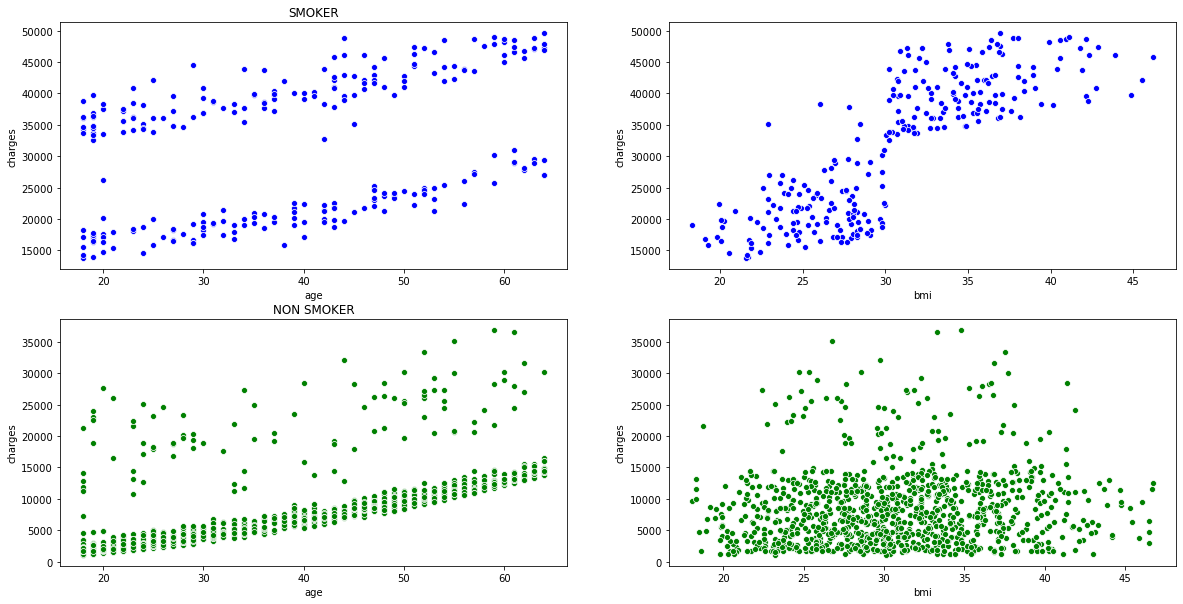

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("SMOKER")
sb.scatterplot(smoker["age"],smoker["charges"], color="blue")
plt.subplot(2,2,2)
sb.scatterplot(smoker["bmi"],smoker["charges"],color="blue")
plt.subplot(2,2,3)
plt.title("NON SMOKER")
sb.scatterplot(non_smoker["age"],non_smoker["charges"], color="green")
plt.subplot(2,2,4)
sb.scatterplot(non_smoker["bmi"],non_smoker["charges"],color="green")

## jawaban nomor 4 dan 5
lakukan pemodelan regresi, analisis hasilnya
### single regression
menggunakan bmi atau menggunkan age, dikelompokan berdasarkan smoker

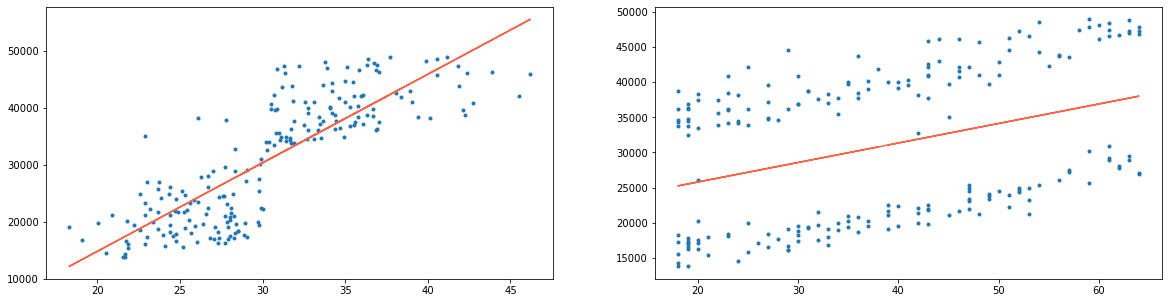

In [17]:
y_smoker = smoker[["charges"]]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
# bmi
bmi_x_smoker = smoker[["bmi"]]
bmi_x_smoker_train, bmi_x_smoker_test, bmi_y_smoker_train, bmi_y_smoker_test = train_test_split(bmi_x_smoker, y_smoker, test_size = 0.2, random_state=42)

bmi_smoker_model = LinearRegression()
bmi_smoker_model.fit(bmi_x_smoker_train,bmi_y_smoker_train)
bmi_y_smoker_pred = bmi_smoker_model.predict(bmi_x_smoker_train)

plt.scatter(bmi_x_smoker_train, bmi_y_smoker_train, marker=".")
plt.plot(bmi_x_smoker_train, bmi_y_smoker_pred, color="tomato")

# age
plt.subplot(1,2,2)
age_x_smoker = smoker[["age"]]
age_x_smoker_train, age_x_smoker_test, age_y_smoker_train, age_y_smoker_test = train_test_split(age_x_smoker, y_smoker, test_size = 0.2, random_state=42)

age_smoker_model = LinearRegression()
age_smoker_model.fit(age_x_smoker_train,age_y_smoker_train)
age_y_smoker_pred = age_smoker_model.predict(age_x_smoker_train)

plt.scatter(age_x_smoker_train, age_y_smoker_train, marker=".")
plt.plot(age_x_smoker_train, age_y_smoker_pred, color="tomato")


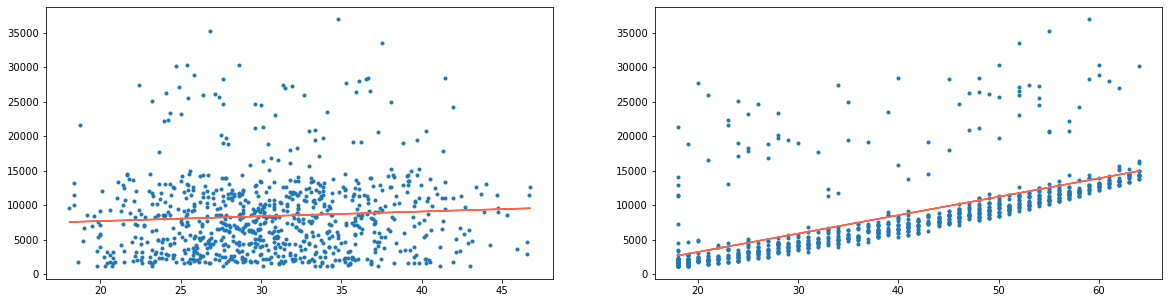

In [18]:
y_nonsmoker = non_smoker[["charges"]]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
# bmi
bmi_x_nonsmoker = non_smoker[["bmi"]]
bmi_x_nonsmoker_train, bmi_x_nonsmoker_test, bmi_y_nonsmoker_train, bmi_y_nonsmoker_test = train_test_split(bmi_x_nonsmoker, y_nonsmoker, test_size = 0.2, random_state=42)

bmi_nonsmoker_model = LinearRegression()
bmi_nonsmoker_model.fit(bmi_x_nonsmoker_train,bmi_y_nonsmoker_train)
bmi_y_nonsmoker_pred = bmi_nonsmoker_model.predict(bmi_x_nonsmoker_train)

plt.scatter(bmi_x_nonsmoker_train, bmi_y_nonsmoker_train, marker=".")
plt.plot(bmi_x_nonsmoker_train, bmi_y_nonsmoker_pred, color="tomato")

# age
plt.subplot(1,2,2)
age_x_nonsmoker = non_smoker[["age"]]
age_x_nonsmoker_train, age_x_nonsmoker_test, age_y_nonsmoker_train, age_y_nonsmoker_test = train_test_split(age_x_nonsmoker, y_nonsmoker, test_size = 0.2, random_state=42)

age_nonsmoker_model = LinearRegression()
age_nonsmoker_model.fit(age_x_nonsmoker_train,age_y_nonsmoker_train)
age_y_nonsmoker_pred = age_nonsmoker_model.predict(age_x_nonsmoker_train)

plt.scatter(age_x_nonsmoker_train, age_y_nonsmoker_train, marker=".")
plt.plot(age_x_nonsmoker_train, age_y_nonsmoker_pred, color="tomato")

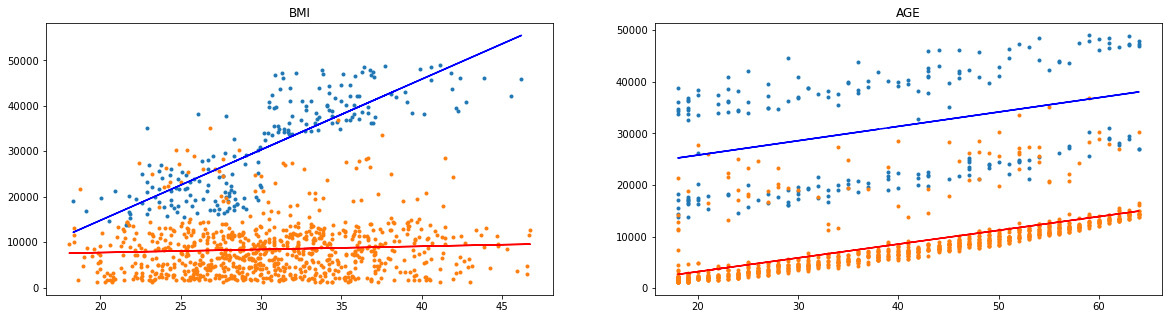

In [19]:
# menggabungkan ke 4 hasil single regression
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("BMI")
plt.scatter(bmi_x_smoker_train, bmi_y_smoker_train, marker=".")
plt.plot(bmi_x_smoker_train, bmi_y_smoker_pred, color="blue")
plt.scatter(bmi_x_nonsmoker_train, bmi_y_nonsmoker_train, marker=".")
plt.plot(bmi_x_nonsmoker_train, bmi_y_nonsmoker_pred, color="red")

plt.subplot(1,2,2)
plt.title("AGE")
plt.scatter(age_x_smoker_train, age_y_smoker_train, marker=".")
plt.plot(age_x_smoker_train, age_y_smoker_pred, color="blue")
plt.scatter(age_x_nonsmoker_train, age_y_nonsmoker_train, marker=".")
plt.plot(age_x_nonsmoker_train, age_y_nonsmoker_pred, color="red")

### evaluasi single regression

In [20]:
#penghitungan score
bmi_smoker_score = bmi_smoker_model.score(bmi_x_smoker_test,bmi_y_smoker_test )
age_smoker_score = age_smoker_model.score(age_x_smoker_test,age_y_smoker_test)
bmi_nonsmoker_score = bmi_nonsmoker_model.score(bmi_x_nonsmoker_test,bmi_y_nonsmoker_test )
age_nonsmoker_score = age_nonsmoker_model.score(age_x_nonsmoker_test,age_y_nonsmoker_test)

print(f"bmi_smoker_score    : {bmi_smoker_score}")
print(f"age_smoker_score    : {age_smoker_score}")
print(f"bmi_nonsmoker_score : {bmi_nonsmoker_score}")
print(f"age_nonsmoker_score : {age_nonsmoker_score}")

bmi_smoker_score    : 0.6933055114422634
age_smoker_score    : 0.08512296668030384
bmi_nonsmoker_score : 0.0064574306627759315
age_nonsmoker_score : 0.3458987964384964


In [21]:
print("COEFISIEN")
print(f"bmi_smoker_coef     : {bmi_smoker_model.coef_}")
print(f"age_smoker_coef     : {age_smoker_model.coef_}")
print(f"bmi_nonsmoker_coef  : {bmi_nonsmoker_model.coef_}")
print(f"age_nonsmoker_coef  : {age_nonsmoker_model.coef_}")
print("===============================================================")
print("INTERCEPTION")
print(f"bmi_smoker_intercept     : {bmi_smoker_model.intercept_}")
print(f"age_smoker_intercept     : {age_smoker_model.intercept_}")
print(f"bmi_nonsmoker_intercept  : {bmi_nonsmoker_model.intercept_}")
print(f"age_nonsmoker_intercept  : {age_nonsmoker_model.intercept_}")
print("===============================================================")

COEFISIEN
bmi_smoker_coef     : [[1553.38624143]]
age_smoker_coef     : [[278.13744554]]
bmi_nonsmoker_coef  : [[69.12890364]]
age_nonsmoker_coef  : [[266.61370155]]
INTERCEPTION
bmi_smoker_intercept     : [-16277.20413978]
age_smoker_intercept     : [20223.46652]
bmi_nonsmoker_intercept  : [6314.61142219]
age_nonsmoker_intercept  : [-2114.14878311]


### Metric Evaluation - single regression

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [23]:
print("mean_squared_error")
print(F"bmi_smoker    : {mean_squared_error(bmi_y_smoker_train,bmi_y_smoker_pred)}")
print(F"age_smoker    : {mean_squared_error(age_y_smoker_train,age_y_smoker_pred)}")
print(F"bmi_nonsmoker : {mean_squared_error(bmi_y_nonsmoker_train,bmi_y_nonsmoker_pred)}")
print(F"age_nonsmoker : {mean_squared_error(age_y_nonsmoker_train,age_y_nonsmoker_pred)}")
print('======================================================')
print("mean_absolute_error")
print(F"bmi_smoker    : {mean_absolute_error(bmi_y_smoker_train,bmi_y_smoker_pred)}")
print(F"age_smoker    : {mean_absolute_error(age_y_smoker_train,age_y_smoker_pred)}")
print(F"bmi_nonsmoker : {mean_absolute_error(bmi_y_nonsmoker_train,bmi_y_nonsmoker_pred)}")
print(F"age_nonsmoker : {mean_absolute_error(age_y_nonsmoker_train,age_y_nonsmoker_pred)}")
print('======================================================')
print("r2_score")
print(F"bmi_smoker    : {r2_score(bmi_y_smoker_train,bmi_y_smoker_pred)}")
print(F"age_smoker    : {r2_score(age_y_smoker_train,age_y_smoker_pred)}")
print(F"bmi_nonsmoker : {r2_score(bmi_y_nonsmoker_train,bmi_y_nonsmoker_pred)}")
print(F"age_nonsmoker : {r2_score(age_y_nonsmoker_train,age_y_nonsmoker_pred)}")
print('======================================================')

mean_squared_error
bmi_smoker    : 35344353.18797615
age_smoker    : 97142302.1189534
bmi_nonsmoker : 34982282.78412131
age_nonsmoker : 21063612.80459886
mean_absolute_error
bmi_smoker    : 4748.24012390177
age_smoker    : 9627.523067274557
bmi_nonsmoker : 4392.897580765604
age_nonsmoker : 2515.7662255201826
r2_score
bmi_smoker    : 0.6860337536738892
age_smoker    : 0.1370784522903521
bmi_nonsmoker : 0.004581521681087941
age_nonsmoker : 0.4006363296745844


## multiple linear regression
dikelompokan berdsarkan kategori smoker, dependent : charges, independen : bmi, age

In [24]:
#smoker
x_smoker = smoker[["bmi", "age"]]
y_smoker = smoker["charges"]
x_smoker_train, x_smoker_test, y_smoker_train, y_smoker_test = train_test_split(x_smoker, y_smoker, test_size = 0.2, random_state=42)

smoker_model = LinearRegression()
smoker_model.fit( x_smoker_train, y_smoker_train)
smoker_predict = smoker_model.predict(x_smoker_train)

#nonsmoker
x_nonsmoker = non_smoker[["bmi", "age"]]
y_nonsmoker = non_smoker["charges"]
x_nonsmoker_train, x_nonsmoker_test, y_nonsmoker_train, y_nonsmoker_test = train_test_split(x_nonsmoker, y_nonsmoker, test_size = 0.2, random_state=42)

nonsmoker_model = LinearRegression()
nonsmoker_model.fit( x_nonsmoker_train, y_nonsmoker_train)
nonsmoker_predict  = nonsmoker_model.predict(x_nonsmoker_train)

### evaluasi multiple regression

In [25]:
#penghitungan score :
print(f"smoker score    : {smoker_model.score(x_smoker_test, y_smoker_test)}")
print(f"nonsmoker score : {nonsmoker_model.score(x_nonsmoker_test, y_nonsmoker_test)}")

smoker score    : 0.8087702368640786
nonsmoker score : 0.3460271501438019


### Metric Evaluation - multiple regression

In [26]:
print("mean_squared_error")
print(F"smoker    : {mean_squared_error(y_smoker_train,smoker_predict)}")
print(F"nonsmoker : {mean_squared_error(y_nonsmoker_train,nonsmoker_predict)}")
print('======================================================')
print("mean_absolute_error")
print(F"smoker    : {mean_absolute_error(y_smoker_train,smoker_predict)}")
print(F"nonsmoker : {mean_absolute_error(y_nonsmoker_train,nonsmoker_predict)}")
print('======================================================')
print("r2_score")
print(F"smoker    : {r2_score(y_smoker_train,smoker_predict)}")
print(F"nonsmoker : {r2_score(y_nonsmoker_train,nonsmoker_predict)}")
print('======================================================')


mean_squared_error
smoker    : 22372595.88883597
nonsmoker : 21062343.475994214
mean_absolute_error
smoker    : 3961.7544375739576
nonsmoker : 2515.267205023244
r2_score
smoker    : 0.8012627387908065
nonsmoker : 0.40067244833373317


## jawaban nomor 6 
regresi logistik

In [27]:
clean_data.describe().T

count          mean           std        min          25%  \
age      1308.0     39.346330     14.045562    18.0000    27.000000   
bmi      1308.0     30.670103      5.786361    18.0500    26.400000   
smoker   1308.0      0.199541      0.399808     0.0000     0.000000   
charges  1308.0  13077.552457  11677.411537  1121.8739  4750.065725   

                50%           75%         max  
age        40.00000     51.000000     64.0000  
bmi        30.40000     34.580000     46.7500  
smoker      0.00000      0.000000      1.0000  
charges  9369.61575  16486.225762  49577.6624

In [28]:
#data binnig, 4720, 9302, 16360
# a-b murah       : label 1
# b-c cukup murah : label 2
# c-d cukup mahal : label 3
# c-d mahal       : label 4
data_logistic = clean_data.copy()
a = 1121
b = 4750
c = 9369
d = 16487
e = 49578
data_logistic["binning"] = pd.cut(clean_data['charges'], bins=[a, b,  c, d, e], labels=[1,2,3,4])
data_logistic.head()

age     bmi  smoker      charges binning
0   19  27.900       1  16884.92400       4
1   18  33.770       0   1725.55230       1
2   28  33.000       0   4449.46200       1
3   33  22.705       0  21984.47061       4
4   32  28.880       0   3866.85520       1

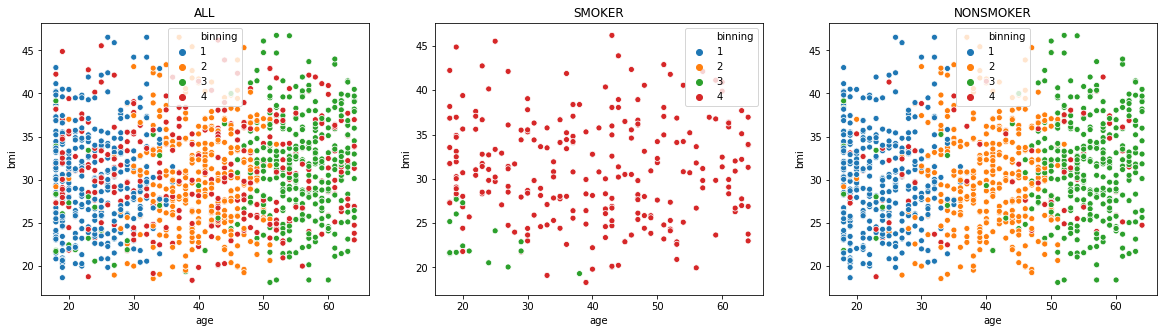

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title("ALL")
sb.scatterplot(data_logistic["age"],data_logistic["bmi"], hue=data_logistic["binning"])
plt.subplot(1,3,2)
plt.title("SMOKER")
sb.scatterplot(data_logistic[data_logistic["smoker"]==1]["age"],data_logistic[data_logistic["smoker"]==1]["bmi"], hue=data_logistic["binning"])
plt.subplot(1,3,3)
plt.title("NONSMOKER")
sb.scatterplot(data_logistic[data_logistic["smoker"]==0]["age"],data_logistic[data_logistic["smoker"]==0]["bmi"], hue=data_logistic["binning"])

In [30]:
#pisahkan atribut dan label
atribut = data_logistic[
    ["age",
    "bmi",
    "smoker"
]]
label = data_logistic["binning"]

In [31]:
# normalisasi ??
scaler = MinMaxScaler()
scaler.fit(atribut)
scaled_data = scaler.transform(atribut)
scaled_data = pd.DataFrame(scaled_data, columns= atribut.columns)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(atribut, label, test_size=0.2, random_state=40)
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
logistic_pred = logistic.predict(x_train)

/home/ryuujin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## jawaban nomor 7
analisis logistic regresion

In [39]:
print(f"koefisien          : ")
print(f"{logistic.coef_}")
print(f"intercept          : {logistic.intercept_}")
print(f"score              : {logistic.score(x_test,y_test)}")
print(f"mean_squared_error : {mean_squared_error(y_train, logistic_pred)}")
print(f"mean_absolute_error: {mean_absolute_error(y_train, logistic_pred)}")
print(f"r2_score           : {r2_score(y_train, logistic_pred)}")

koefisien          : 
[[-2.57393800e-01  1.51216387e-03 -3.36028157e+00]
 [ 1.19986184e-02 -1.62166868e-02 -1.96202159e+00]
 [ 1.77466947e-01 -1.27286569e-02  6.39885207e-01]
 [ 6.79282352e-02  2.74331798e-02  4.68241795e+00]]
intercept          : [ 9.07707744  1.369079   -6.69310311 -3.75305333]
score              : 0.851145038167939
mean_squared_error : 0.3776290630975143
mean_absolute_error: 0.22848948374760994
r2_score           : 0.6969616957295047
